In [3]:
### Start a Spark Session ###
from pyspark.sql import SparkSession

In [4]:
### Create a Spark Session ### 
spark = SparkSession.builder.appName("city").getOrCreate()
spark

In [24]:
### Load the city.csv file, have Spark infer the data types
cityDf = spark.read.csv('city_mrg.csv',header=True,inferSchema=True)

In [25]:
# list of cols
cityDf.columns

['country',
 'id',
 'lat',
 'lng',
 'name',
 'clouds',
 'date',
 'humidity',
 'pressure',
 'temp',
 'temp_max',
 'temp_min',
 'wind_deg',
 'wind_speed']

In [26]:
cityDf.head(2)

[Row(country='RU', id=2017370, lat=60.0, lng=100.0, name='Russian Federation', clouds=80, date='11/19/2017 3:00', humidity=84, pressure=991.81, temp=-16.43, temp_max=-16.43, temp_min=-16.43, wind_deg=144.001, wind_speed=2.42),
 Row(country='IN', id=1257986, lat=34.049999, lng=77.416664, name='Rumbak', clouds=36, date='11/19/2017 3:00', humidity=71, pressure=605.31, temp=-18.98, temp_max=-18.98, temp_min=-18.98, wind_deg=176.501, wind_speed=0.37)]

In [27]:
# run selection
cityDfSelect=cityDf.select(['temp_max','temp_min','wind_deg','wind_speed'])

In [28]:
type(cityDfSelect)

pyspark.sql.dataframe.DataFrame

In [29]:
cityDfSelect.describe().show()

+-------+------------------+------------------+------------------+------------------+
|summary|          temp_max|          temp_min|          wind_deg|        wind_speed|
+-------+------------------+------------------+------------------+------------------+
|  count|              2999|              2999|              2999|              2999|
|   mean|  9.22234078026009| 8.598646215405118|177.99869712625923| 3.108312770923676|
| stddev|13.077759012018257|13.187160595477907|106.87473659471442|2.3581797278040635|
|    min|            -41.43|            -41.43|        0.00109863|              0.02|
|    max|             45.88|             38.82|           359.501|             19.32|
+-------+------------------+------------------+------------------+------------------+



In [30]:
# print sc
cityDf.printSchema()

root
 |-- country: string (nullable = true)
 |-- id: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- lng: double (nullable = true)
 |-- name: string (nullable = true)
 |-- clouds: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- humidity: integer (nullable = true)
 |-- pressure: double (nullable = true)
 |-- temp: double (nullable = true)
 |-- temp_max: double (nullable = true)
 |-- temp_min: double (nullable = true)
 |-- wind_deg: double (nullable = true)
 |-- wind_speed: double (nullable = true)



In [31]:
# show one col
cityDf.select('temp_min').show()

+--------+
|temp_min|
+--------+
|  -16.43|
|  -18.98|
|    19.9|
|   19.82|
|  -18.11|
|   -0.63|
|    17.2|
|   21.47|
|   20.22|
|   21.62|
|    0.82|
|   18.47|
|   28.95|
|   -5.48|
|    2.42|
|   28.15|
|   23.17|
|   12.65|
|   19.07|
|   19.95|
+--------+
only showing top 20 rows



In [32]:
# Create a new col
cityDf = cityDf.withColumn('temp_span', cityDf['temp_max'] - cityDf['temp_min'])

In [38]:
# select the new col and use it stats 
cityDf.select('temp_span').describe().show()

+-------+------------------+
|summary|         temp_span|
+-------+------------------+
|  count|              2999|
|   mean|0.6236945648549501|
| stddev|1.2836900436473155|
|    min|               0.0|
|    max|12.770000000000001|
+-------+------------------+



In [45]:
cityDf.printSchema()

root
 |-- country: string (nullable = true)
 |-- id: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- lng: double (nullable = true)
 |-- name: string (nullable = true)
 |-- clouds: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- humidity: integer (nullable = true)
 |-- pressure: double (nullable = true)
 |-- temp: double (nullable = true)
 |-- temp_max: double (nullable = true)
 |-- temp_min: double (nullable = true)
 |-- wind_deg: double (nullable = true)
 |-- wind_speed: double (nullable = true)
 |-- temp_span: double (nullable = true)



In [58]:
# Order a dataframe by ascending values
cityDf.orderBy(cityDf["country"].asc()).head(2)

[Row(country='AE', id=290557, lat=24.0, lng=54.0, name='United Arab Emirates', clouds=0, date='11/19/2017 3:00', humidity=79, pressure=1028.45, temp=19.08, temp_max=19.08, temp_min=17.8, wind_deg=77.5011, wind_speed=1.52, temp_span=1.2799999999999976),
 Row(country='AF', id=1122189, lat=33.97509, lng=63.72868, name='Tulak', clouds=0, date='11/19/2017 3:00', humidity=55, pressure=786.81, temp=-11.53, temp_max=-11.53, temp_min=-11.53, wind_deg=106.501, wind_speed=1.97, temp_span=0.0),
 Row(country='AF', id=1125890, lat=36.979839, lng=70.739281, name='Shahran', clouds=0, date='11/19/2017 3:00', humidity=67, pressure=758.68, temp=-9.05, temp_max=-9.05, temp_min=-9.06, wind_deg=79.5011, wind_speed=1.67, temp_span=0.009999999999999787)]

In [60]:
# Order a dataframe by ascending values
cityDf.orderBy(cityDf["country"].desc()).head(2)

[Row(country='ZW', id=878675, lat=-19.0, lng=29.0, name='Republic of Zimbabwe', clouds=76, date='11/19/2017 3:00', humidity=96, pressure=895.18, temp=15.7, temp_max=15.7, temp_min=15.7, wind_deg=79.0011, wind_speed=4.57, temp_span=0.0),
 Row(country='ZW', id=894366, lat=-22.116671, lng=30.066669, name='Chamnanga', clouds=0, date='11/19/2017 3:00', humidity=97, pressure=967.41, temp=16.65, temp_max=16.65, temp_min=16.65, wind_deg=73.0011, wind_speed=2.42, temp_span=0.0)]

In [66]:
# use sql q
cityDf.filter("temp_max > 35").show()

+-------+-------+----------+----------+------------------+------+---------------+--------+--------+-----+--------+--------+--------+----------+-----------------+
|country|     id|       lat|       lng|              name|clouds|           date|humidity|pressure| temp|temp_max|temp_min|wind_deg|wind_speed|        temp_span|
+-------+-------+----------+----------+------------------+------+---------------+--------+--------+-----+--------+--------+--------+----------+-----------------+
|     AU|2064513|     -20.0|     134.0|Northern Territory|     0|11/19/2017 3:00|      25|  983.05|45.88|   45.88|   38.82| 338.501|      2.37|7.060000000000002|
|     AU|2076017|-16.066669|136.283325|        Borroloola|     0|11/19/2017 3:00|      39| 1015.48|37.62|   37.62|   37.62| 25.0011|      2.27|              0.0|
|     AU|7839634|-21.039709| 116.85743|         Roebourne|     0|11/19/2017 3:00|      19| 1008.42|36.27|   36.27|   36.27| 23.5011|      1.92|              0.0|
|     AU|2066808| -14.93333|

In [68]:
cityDf.filter("temp_max > 35").select(['country', 'name', 'temp_min', 'temp_max']).show()

+-------+------------------+--------+
|country|              name|temp_max|
+-------+------------------+--------+
|     AU|Northern Territory|   45.88|
|     AU|        Borroloola|   37.62|
|     AU|         Roebourne|   36.27|
|     AU|         Mataranka|   36.45|
|     AU|          Biboohra|   35.65|
|     AU|         Camooweal|    37.2|
|     AU|     Victoria-Daly|   35.77|
+-------+------------------+--------+



In [72]:
cityDf.filter("temp_min < -35").select(['country', 'name', 'temp_min','temp_max']).show()

+-------+-----------+--------+--------+
|country|       name|temp_min|temp_max|
+-------+-----------+--------+--------+
|     GL|  Greenland|  -41.43|  -41.43|
|     RU|   Khatassy|   -35.6|  -28.43|
|     CA|Dawson City|  -35.38|  -33.36|
+-------+-----------+--------+--------+



In [78]:
cityDf.filter("temp_min < -35").select(['country', 'name', 'temp_min','temp_max']).show()

+-------+-----------+--------+--------+
|country|       name|temp_min|temp_max|
+-------+-----------+--------+--------+
|     GL|  Greenland|  -41.43|  -41.43|
|     RU|   Khatassy|   -35.6|  -28.43|
|     CA|Dawson City|  -35.38|  -33.36|
+-------+-----------+--------+--------+



In [76]:
dfSelectVeryCold= cityDf.filter("temp_min < -35").select(['country', 'name', 'temp_min','temp_max'])

In [77]:
dfSelectVeryCold.show()

+-------+-----------+--------+--------+
|country|       name|temp_min|temp_max|
+-------+-----------+--------+--------+
|     GL|  Greenland|  -41.43|  -41.43|
|     RU|   Khatassy|   -35.6|  -28.43|
|     CA|Dawson City|  -35.38|  -33.36|
+-------+-----------+--------+--------+



### Using Python Comparison Operators

In [82]:
# use python type to filter
cityDf.filter(cityDf["temp_max"] > 45).show()

+-------+-------+-----+-----+------------------+------+---------------+--------+--------+-----+--------+--------+--------+----------+-----------------+
|country|     id|  lat|  lng|              name|clouds|           date|humidity|pressure| temp|temp_max|temp_min|wind_deg|wind_speed|        temp_span|
+-------+-------+-----+-----+------------------+------+---------------+--------+--------+-----+--------+--------+--------+----------+-----------------+
|     AU|2064513|-20.0|134.0|Northern Territory|     0|11/19/2017 3:00|      25|  983.05|45.88|   45.88|   38.82| 338.501|      2.37|7.060000000000002|
+-------+-------+-----+-----+------------------+------+---------------+--------+--------+-----+--------+--------+--------+----------+-----------------+



In [86]:
# Show cities with very low and high temps 
cityDf.filter((cityDf["temp_max"] > 45) | (cityDf["temp_min"] < -35)).show()

+-------+-------+---------+-----------+------------------+------+---------------+--------+--------+------+--------+--------+--------+----------+-----------------+
|country|     id|      lat|        lng|              name|clouds|           date|humidity|pressure|  temp|temp_max|temp_min|wind_deg|wind_speed|        temp_span|
+-------+-------+---------+-----------+------------------+------+---------------+--------+--------+------+--------+--------+--------+----------+-----------------+
|     AU|2064513|    -20.0|      134.0|Northern Territory|     0|11/19/2017 3:00|      25|  983.05| 45.88|   45.88|   38.82| 338.501|      2.37|7.060000000000002|
|     GL|3425505|     72.0|      -40.0|         Greenland|    20|11/19/2017 3:00|       0|  703.32|-41.43|  -41.43|  -41.43| 117.501|      6.27|              0.0|
|     RU|2022564| 61.90361| 129.638336|          Khatassy|    48|11/19/2017 3:00|      83| 1014.34| -35.6|  -28.43|   -35.6| 44.5011|      1.57|7.170000000000002|
|     CA|6943713|64.06

In [92]:
cityDf.filter(cityDf["country"] == "LY").show()

+-------+-------+---------+---------+--------------------+------+---------------+--------+--------+-----+--------+--------+--------+----------+------------------+
|country|     id|      lat|      lng|                name|clouds|           date|humidity|pressure| temp|temp_max|temp_min|wind_deg|wind_speed|         temp_span|
+-------+-------+---------+---------+--------------------+------+---------------+--------+--------+-----+--------+--------+--------+----------+------------------+
|     LY|2208655| 32.94701| 11.86647|              Zaltan|     8|11/19/2017 3:00|     100| 1031.12|13.77|   13.77|   13.77| 260.501|      4.52|               0.0|
|     LY|2214433|31.868481|  10.9812|               Nalut|     0|11/19/2017 3:00|      82|  976.49| 4.02|    4.02|    4.02| 256.001|      1.07|               0.0|
|     LY|2219960|27.049999|     14.4|            Al Jadid|    92|11/19/2017 3:00|      34|  978.19| 7.65|    7.65|    7.65| 57.5011|      2.22|               0.0|
|     LY|2215636|     

In [105]:
cityDf.orderBy(cityDf['temp_min'].asc()).select("country","name", "temp_min").show()

+-------+--------------------+--------+
|country|                name|temp_min|
+-------+--------------------+--------+
|     GL|           Greenland|  -41.43|
|     RU|            Khatassy|   -35.6|
|     CA|         Dawson City|  -35.38|
|     US|              Paxson|  -34.18|
|     RU|           Myaundzha|  -33.98|
|     RU|              Sangar|  -31.38|
|     US|   Chena Hot Springs|  -31.03|
|     US|             Chisana|  -30.71|
|     RU|             Ugakhyn|  -30.43|
|     US|    Eureka Roadhouse|  -29.61|
|     RU|                Amga|  -28.58|
|     RU|Magadanskaya Oblast�|  -28.06|
|     RU|   Khabarovskiy Kray|  -27.71|
|     AF|             Khandud|  -26.83|
|     RU|              Tommot|  -26.81|
|     US|               Ester|  -26.44|
|     KG|Issyk-Kul�skaya O...|  -26.23|
|     US|      Delta Junction|  -25.78|
|     RU|            Ekimchan|  -25.63|
|     RU|           Sinegorye|  -25.38|
+-------+--------------------+--------+
only showing top 20 rows



In [106]:
cityDf.orderBy(cityDf['temp_max'].desc()).select("country","name", "temp_min").show()

+-------+--------------------+--------+
|country|                name|temp_min|
+-------+--------------------+--------+
|     AU|  Northern Territory|   38.82|
|     AU|          Borroloola|   37.62|
|     AU|           Camooweal|    37.2|
|     AU|           Mataranka|   36.45|
|     AU|           Roebourne|   36.27|
|     AU|       Victoria-Daly|   35.77|
|     AU|            Biboohra|    31.4|
|     ID|Republic of Indon...|   30.95|
|     AU|          Barcaldine|   34.72|
|     ID|Provinsi Papua Barat|    33.2|
|     ID|           Sidenreng|   33.17|
|     ID|            Parengan|    30.2|
|     PG| East Sepik Province|   32.87|
|     AU|             Adavale|   32.37|
|     ID|         Kualakapuas|   31.72|
|     AU|         Coober Pedy|   32.22|
|     AU|State of Western ...|   32.12|
|     ID|        Sangkulirang|   32.02|
|     MY|Kampong Pangkal K...|   29.62|
|     AU|            Dimbulah|   31.47|
+-------+--------------------+--------+
only showing top 20 rows



### Stats 

In [133]:
cityDf.describe()

DataFrame[summary: string, country: string, id: string, lat: string, lng: string, name: string, clouds: string, date: string, humidity: string, pressure: string, temp: string, temp_max: string, temp_min: string, wind_deg: string, wind_speed: string, temp_span: string]

In [108]:
# What is the mean temp_max of this dataset?
from pyspark.sql.functions import mean
cityDf.select(mean("temp_min")).show()

+-----------------+
|    avg(temp_min)|
+-----------------+
|8.598646215405118|
+-----------------+



In [112]:
# What is the mean temp_max of this dataset?
import pyspark.sql.functions as funcs 
cityDf.select(funcs.max("temp_min")).show()

+-------------+
|max(temp_min)|
+-------------+
|        38.82|
+-------------+



In [113]:
cityDf.select(funcs.min("temp_min")).show()

+-------------+
|min(temp_min)|
+-------------+
|       -41.43|
+-------------+



In [114]:
cityDf.select(funcs.max("temp_min")).show()

+-------------+
|max(temp_min)|
+-------------+
|        38.82|
+-------------+



In [115]:
cityDf.select(funcs.mean("temp_min")).show()

+-----------------+
|    avg(temp_min)|
+-----------------+
|8.598646215405118|
+-----------------+



In [121]:
cityDf.select(funcs.mean("temp_min"), funcs.min("temp_min"), funcs.max("temp_min")).show()

+-----------------+-------------+-------------+
|    avg(temp_min)|min(temp_min)|max(temp_min)|
+-----------------+-------------+-------------+
|8.598646215405118|       -41.43|        38.82|
+-----------------+-------------+-------------+



In [123]:
cityDf.select('temp_min').describe().show()

+-------+------------------+
|summary|          temp_min|
+-------+------------------+
|  count|              2999|
|   mean| 8.598646215405118|
| stddev|13.187160595477907|
|    min|            -41.43|
|    max|             38.82|
+-------+------------------+



In [128]:
# Show all city with temp more than 35
cityDf.filter('temp_max > 35').select('country',"name").show()

+-------+------------------+
|country|              name|
+-------+------------------+
|     AU|Northern Territory|
|     AU|        Borroloola|
|     AU|         Roebourne|
|     AU|         Mataranka|
|     AU|          Biboohra|
|     AU|         Camooweal|
|     AU|     Victoria-Daly|
+-------+------------------+



In [130]:
# Show all city with temp more than 35
cityDf.filter('temp_max > 35').select('country',"name").head(3)

[Row(country='AU', name='Northern Territory'),
 Row(country='AU', name='Borroloola'),
 Row(country='AU', name='Roebourne')]

In [153]:
# what is the average for each country 

dfSel = cityDf.groupBy(["country", "name"]).avg()

In [156]:
dfSel.select("name", "avg(temp_max)", "avg(temp_min)").orderBy('avg(temp_max)'). show()

+--------------------+-------------+-------------+
|                name|avg(temp_max)|avg(temp_min)|
+--------------------+-------------+-------------+
|           Greenland|       -41.43|       -41.43|
|              Paxson|       -34.18|       -34.18|
|           Myaundzha|       -33.98|       -33.98|
|         Dawson City|       -33.36|       -35.38|
|              Sangar|       -31.38|       -31.38|
|             Chisana|        -30.7|       -30.71|
|             Ugakhyn|       -30.43|       -30.43|
|   Chena Hot Springs|       -29.77|       -31.03|
|                Amga|       -28.58|       -28.58|
|            Khatassy|       -28.43|        -35.6|
|Magadanskaya Oblast�|       -28.05|       -28.06|
|   Khabarovskiy Kray|        -27.7|       -27.71|
|             Khandud|       -26.83|       -26.83|
|              Tommot|        -26.8|       -26.81|
|               Ester|       -26.31|       -26.44|
|Issyk-Kul�skaya O...|       -26.23|       -26.23|
|            Ekimchan|       -2

### Part 2 

In [157]:
# Read in data and store in dataframe
dfRain = spark.read.csv("rainfall.csv", header=True, inferSchema=True)

In [158]:
dfRain.show()

+-----------+-------------------+----+----+
|    station|               date|prcp|tobs|
+-----------+-------------------+----+----+
|USC00519397|2010-01-01 00:00:00|0.08|  65|
|USC00519397|2010-01-02 00:00:00| 0.0|  63|
|USC00519397|2010-01-03 00:00:00| 0.0|  74|
|USC00519397|2010-01-04 00:00:00| 0.0|  76|
|USC00519397|2010-01-06 00:00:00|null|  73|
|USC00519397|2010-01-07 00:00:00|0.06|  70|
|USC00519397|2010-01-08 00:00:00| 0.0|  64|
|USC00519397|2010-01-09 00:00:00| 0.0|  68|
|USC00519397|2010-01-10 00:00:00| 0.0|  73|
|USC00519397|2010-01-11 00:00:00|0.01|  64|
|USC00519397|2010-01-12 00:00:00| 0.0|  61|
|USC00519397|2010-01-14 00:00:00| 0.0|  66|
|USC00519397|2010-01-15 00:00:00| 0.0|  65|
|USC00519397|2010-01-16 00:00:00| 0.0|  68|
|USC00519397|2010-01-17 00:00:00| 0.0|  64|
|USC00519397|2010-01-18 00:00:00| 0.0|  72|
|USC00519397|2010-01-19 00:00:00| 0.0|  66|
|USC00519397|2010-01-20 00:00:00| 0.0|  66|
|USC00519397|2010-01-21 00:00:00| 0.0|  69|
|USC00519397|2010-01-22 00:00:00

In [173]:
# Import date time functions
from pyspark.sql.functions import year, month

In [163]:
dfRain.select(year(dfRain['date'])).show()

+----------+
|year(date)|
+----------+
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
+----------+
only showing top 20 rows



In [174]:
dfRain = dfRain.withColumn("year", year(dfRain['date']))
dfRain = dfRain.withColumn("month", month(dfRain['date']))

In [175]:
dfRain.show()

+-----------+-------------------+----+----+----+-----+
|    station|               date|prcp|tobs|year|month|
+-----------+-------------------+----+----+----+-----+
|USC00519397|2010-01-01 00:00:00|0.08|  65|2010|    1|
|USC00519397|2010-01-02 00:00:00| 0.0|  63|2010|    1|
|USC00519397|2010-01-03 00:00:00| 0.0|  74|2010|    1|
|USC00519397|2010-01-04 00:00:00| 0.0|  76|2010|    1|
|USC00519397|2010-01-06 00:00:00|null|  73|2010|    1|
|USC00519397|2010-01-07 00:00:00|0.06|  70|2010|    1|
|USC00519397|2010-01-08 00:00:00| 0.0|  64|2010|    1|
|USC00519397|2010-01-09 00:00:00| 0.0|  68|2010|    1|
|USC00519397|2010-01-10 00:00:00| 0.0|  73|2010|    1|
|USC00519397|2010-01-11 00:00:00|0.01|  64|2010|    1|
|USC00519397|2010-01-12 00:00:00| 0.0|  61|2010|    1|
|USC00519397|2010-01-14 00:00:00| 0.0|  66|2010|    1|
|USC00519397|2010-01-15 00:00:00| 0.0|  65|2010|    1|
|USC00519397|2010-01-16 00:00:00| 0.0|  68|2010|    1|
|USC00519397|2010-01-17 00:00:00| 0.0|  64|2010|    1|
|USC005193

In [168]:
avgRainFall = dfRain.groupBy("year").avg()

In [171]:
avgRainFall.select("year",  'avg(prcp)').show()

+----+-------------------+
|year|          avg(prcp)|
+----+-------------------+
|2015|0.19919999999999985|
|2013|0.15554567502020986|
|2014|0.17855953372189803|
|2012| 0.1163805668016194|
|2016|0.17984533591106822|
|2010|0.13852293920179035|
|2011| 0.1637348927875241|
|2017|0.16592738752959774|
+----+-------------------+



In [177]:
maxRainFall_month = dfRain.groupBy("month").max()

In [182]:
maxRainFall_month.select("month", "max(prcp)").orderBy("month").show()

+-----+---------+
|month|max(prcp)|
+-----+---------+
|    1|     8.81|
|    2|     5.04|
|    3|     6.38|
|    4|     6.25|
|    5|     4.07|
|    6|     4.43|
|    7|    11.53|
|    8|     4.81|
|    9|     6.83|
|   10|     4.47|
|   11|     8.06|
|   12|     6.42|
+-----+---------+



In [183]:
import pandas as pd

In [185]:
df = maxRainFall_month.select("month", "max(prcp)").orderBy("month").toPandas()

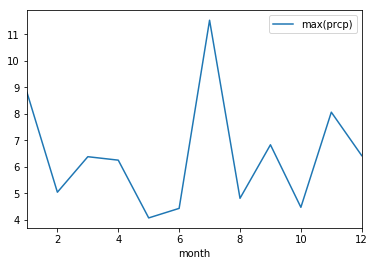

In [188]:
%matplotlib inline
df.plot("month", "max(prcp)", kind='line')

In [189]:
maxRainFall_month.printSchema()

root
 |-- month: integer (nullable = true)
 |-- max(prcp): double (nullable = true)
 |-- max(tobs): integer (nullable = true)
 |-- max(year): integer (nullable = true)
 |-- max(month): integer (nullable = true)



In [190]:
month_rCount = dfRain.groupBy("month").count()

In [193]:
month_rCount.orderBy("month").show()

+-----+-----+
|month|count|
+-----+-----+
|    1| 1727|
|    2| 1610|
|    3| 1693|
|    4| 1713|
|    5| 1733|
|    6| 1700|
|    7| 1711|
|    8| 1622|
|    9| 1480|
|   10| 1556|
|   11| 1488|
|   12| 1517|
+-----+-----+



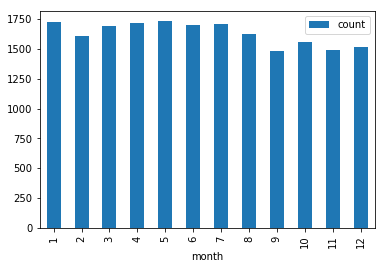

In [195]:
month_rCount.orderBy("month").toPandas().plot("month", "count", kind='bar')